
Income inequality in Poland data for last 10 years.
Gini index measures the extent to which the distribution of income or consumption expenditure among individuals or households within an economy deviates from a perfectly equal distribution. A Lorenz curve plots the cumulative percentages of total income received against the cumulative number of recipients, starting with the poorest individual or household. The Gini index measures the area between the Lorenz curve and a hypothetical line of absolute equality, expressed as a percentage of the maximum area under the line. Thus a Gini index of 0 represents perfect equality, while an index of 100 implies perfect inequality.

Source: World Bank  Release: World Development Indicators  
Units:  Index, Not Seasonally Adjusted
Frequency:  Annual


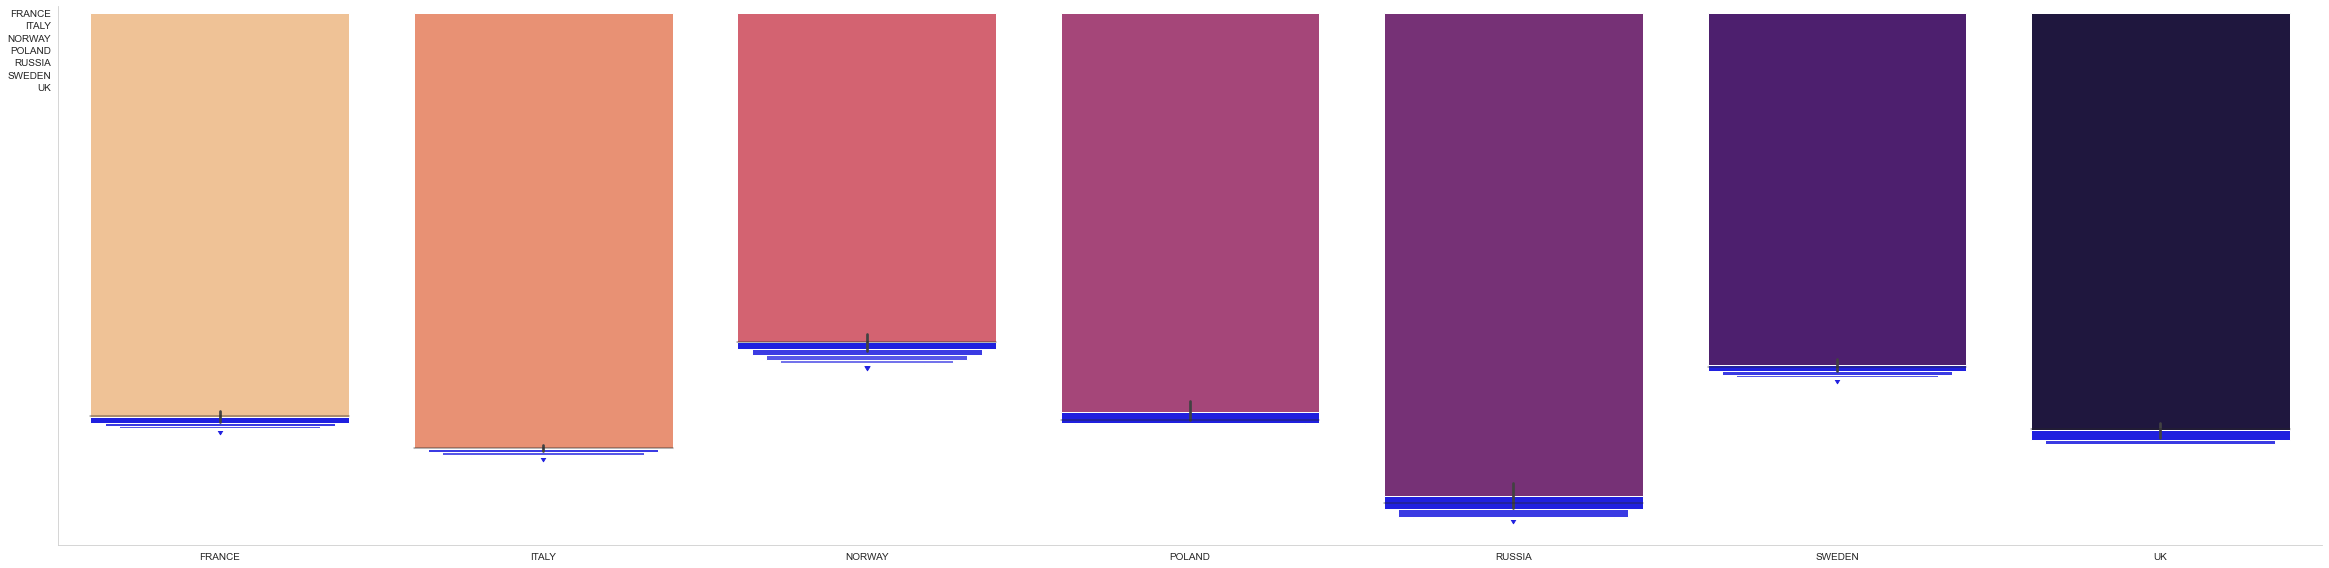

In [41]:
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set_style("whitegrid")
%matplotlib inline
def get_data(symbols, start = datetime.datetime(2010, 1, 1), end = datetime.datetime.now()):
    result = None
    for symbol in symbols:
        df = pdr.DataReader(symbol['symbol'], 'fred', start, end)
        df = df.rename(columns={df.columns[0]: symbol['title']})
        if result is None:
            result = df.copy()
        else:
            result = pd.merge_asof(left=result.copy(), right=df, on='DATE')
           
    result = result.set_index('DATE')
    return result
symbols = [
    {'symbol': 'SIPOVGINIFRA', 'title': 'FRANCE'},
    {'symbol': 'SIPOVGINIITA', 'title': 'ITALY'},
    {'symbol': 'SIPOVGININOR', 'title': 'NORWAY'},
    {'symbol': 'SIPOVGINIPOL', 'title': 'POLAND'},
    {'symbol': 'SIPOVGINIRUS', 'title': 'RUSSIA'},
    {'symbol': 'SIPOVGINISWE', 'title': 'SWEDEN'},
    {'symbol': 'SIPOVGINIGBR', 'title': 'UK'},
]    
fred_data = get_data(symbols)
sns.catplot(kind='bar',palette="magma_r", data=fred_data,height=8, aspect=4)
sns.boxplot(data=fred_data, palette='husl', orient='h')
plt.rcParams['figure.figsize'] = (20,10)
sns.boxenplot(color="b", scale="linear", data=fred_data)
plt.rcParams['figure.figsize'] = (20,6)

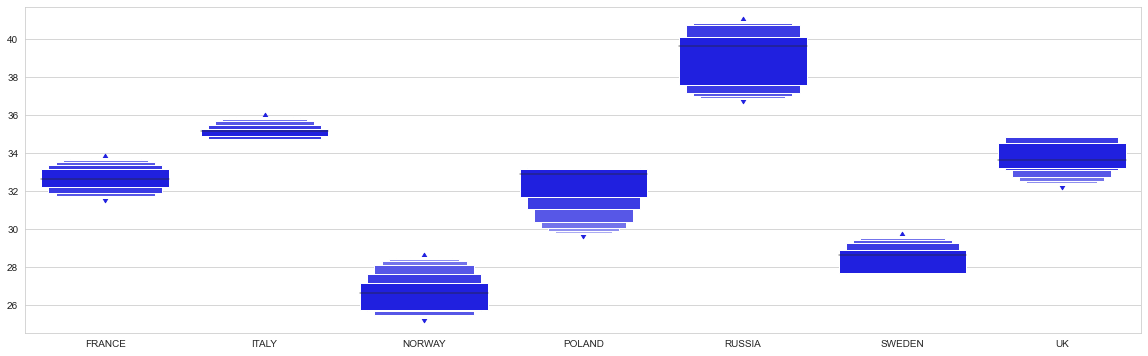

In [38]:
sns.boxenplot(color="b", scale="linear", data=fred_data)
plt.rcParams['figure.figsize'] = (20,6)